# Chapter py_10 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import pandas as pd
delta_wire = pd.read_csv("delta-wire.csv")
formula = "productivity ~ training"
model_definition = smf.ols(formula, data=delta_wire)
model = model_definition.fit()

In [4]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           productivity   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     662.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           1.90e-14
Time:                        10:14:45   Log-Likelihood:                -148.92
No. Observations:                  18   AIC:                             301.8
Df Residuals:                      16   BIC:                             303.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.088e+04    394.546    179.650      0.0

/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


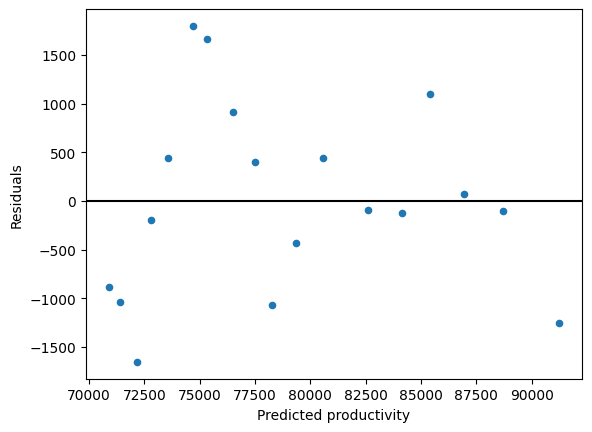

In [5]:
df = pd.DataFrame({"predicted": model.fittedvalues, "residuals": model.resid})
ax = df.plot.scatter(x="predicted", y="residuals")

ax.set_xlabel("Predicted productivity")
ax.set_ylabel("Residuals")
ax.axhline(0, color="black")
plt.show()

In [6]:
prediction = model.predict({"training": [1230, 2390]})
print(prediction)

0    77145.189207
1    83053.584830
dtype: float64


In [7]:
import statsmodels.api as sm
import pandas as pd
delta_wire = pd.read_csv("delta-wire.csv")
X = delta_wire["training"]
y = delta_wire["productivity"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


                                 OLS Regression Results                                
Dep. Variable:           productivity   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              41.83
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                    5.79e-06
Time:                        10:14:45   Log-Likelihood:                         -217.41
No. Observations:                  18   AIC:                                      436.8
Df Residuals:                      17   BIC:                                      437.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
X = delta_wire["training"]
y = delta_wire["productivity"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           productivity   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     662.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           1.90e-14
Time:                        10:14:45   Log-Likelihood:                -148.92
No. Observations:                  18   AIC:                             301.8
Df Residuals:                      16   BIC:                             303.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.088e+04    394.546    179.650      0.0

/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


In [9]:
formula = "productivity ~ training - 1"
formula = "productivity ~ training + 0"

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
delta_wire = pd.read_csv("delta-wire.csv")
X = delta_wire[["training"]]
y = delta_wire["productivity"]
model = LinearRegression()
model.fit(X, y)
print(f"Model intercept: {model.intercept_}")
print(f"Model coefficients: {model.coef_}")

Model intercept: 70880.25246964331
Model coefficients: [5.0934445]


In [11]:
new_data = pd.DataFrame({'training': [1230, 2390]})
prediction = model.predict(new_data)
print(prediction)

[77145.18920738 83053.58482997]


In [12]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.0
[33.51789232]


In [13]:
from sklearn.model_selection import train_test_split

baseball = pd.read_csv("baseball_payroll.csv")
X = baseball[["Average Payroll (Million)"]]
y = baseball["Total Wins"]

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y,
test_size=0.2,
random_state=123)

model_full = LinearRegression()
model_full.fit(X, y)
model_train = LinearRegression()
model_train.fit(X_train, y_train)

print(f"Full model intercept: {model_full.intercept_}")
print(f"Full model coefficients: {model_full.coef_}")
print(f"Model intercept: {model_train.intercept_}")
print(f"Model coefficients: {model_train.coef_}")

Full model intercept: 207.47931041732843
Full model coefficients: [0.3904698]
Model intercept: 213.31899006194885
Model coefficients: [0.32644877]


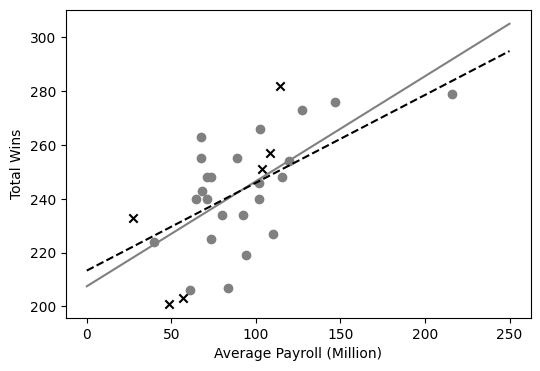

In [14]:
x_range = pd.DataFrame({'Average Payroll (Million)': [0, 250]})
fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(x_range, model_full.predict(x_range), color='grey')
ax.scatter(X_train, y_train, color='grey')
ax.plot(x_range, model_train.predict(x_range), color='black', linestyle='dashed')
ax.scatter(X_holdout, y_holdout, color='black', marker='x')
ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Total Wins")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
rmse_full = mean_squared_error(y, model_full.predict(X), squared=False)
rmse_train = mean_squared_error(y_train, model_train.predict(X_train), squared=False)
rmse_holdout = mean_squared_error(y_holdout, model_train.predict(X_holdout), squared=False)
print(f"Full RMSE: {rmse_full:.3f}")
print(f"Training RMSE: {rmse_train:.3f}")
print(f"Holdout RMSE: {rmse_holdout:.3f}")

Full RMSE: 16.904
Training RMSE: 15.701
Holdout RMSE: 21.643


/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/petergedeck/git/Wiley-Statistics-for-Data-Science-and-Analytics/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
